In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 1.00
x0 = 0.5
T = 300

In [3]:
# r = 0.05
r = 1.2

In [4]:
# tao = 8
# tao = 11
# tao = 20
tao = 35

In [5]:
dt = 1
t = np.linspace(0, T, int(T/dt) + 1)

# t = []
# for i in range (0, T+1):
#     t.append(i)

In [6]:
def f(t, xt, xt_tao):
    return r * xt * (1 - (xt_tao / k))

In [7]:
# Estimate by Euler's Forward Difference Method
# x_euler = np.zeros(len(t))
# x_euler[0] = x0
# # x_euler = []
# # x_euler.append(x0)

# for i in range(1, len(t)):
#     if (t[i] < tao):
#         xt_tao = 0
#     else:
#         xt_tao = x_euler[int(t[i]-tao)]
        
#     x_euler[i] = x_euler[i-1] + dt * f(t[i], x_euler[i-1], xt_tao)
#     # x_euler.append(x_euler[i-1] + dt * f(t[i], x_euler[i-1], xt_tao))


In [8]:
# Estimate by Runge-Kutta Method
x_rk = np.zeros(len(t))
x_rk[0] = x0
# x_rk = []
# x_rk.append(x0)

for i in range(1, len(t)):
    if (t[i] < tao):
        xt_tao = 0
    else:
        xt_tao = x_rk[int(t[i]-tao)]
    
    k1 = f(t[i], x_rk[i-1], xt_tao)
    k2 = f(t[i], x_rk[i-1] + k1 * dt/2, xt_tao + k1 * dt/2)
    k3 = f(t[i], x_rk[i-1] + k2 * dt/2, xt_tao + k2 * dt/2)
    k4 = f(t[i], x_rk[i-1] + k3 * dt, xt_tao + k3 * dt)
    x_rk[i] = x_rk[i-1] + (1/6) * dt * (k1 + 2*k2 + 2*k3 + k4)
    # x_rk.append(x_rk[i-1] + (1/6) * dt * (k1 + 2*k2 + 2*k3 + k4))
    

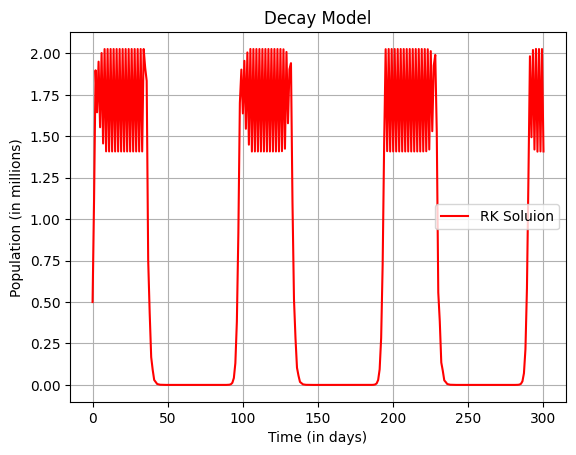

In [9]:
# plt.plot(t, x_euler, label='Euler\'s Soluion', color='blue')
plt.plot(t, x_rk, label='RK Soluion', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('Decay Model')
plt.legend()
plt.grid()

plt.show()